In [ ]:
# NUMERICAL DIFFERENTIATION
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
plt.rcParams['figure.dpi'] = 120
plt.rcParams["figure.autolayout"] = True

def showTheoreticalError(n):
    #with plt.xkcd():
        fig = plt.figure(figsize=(9,4.5))
        ax = fig.add_axes((0.1, 0.2, 0.8, 0.7))
        ax.spines['right'].set_color('none')
        ax.spines['top'].set_color('none')
        title = 'Schematic error of the FDM for $\mathcal{O}$';
        plt.title('{:s}$(h^{:d})$'.format(title, n) )
        plt.xlabel('$h$')
        plt.ylabel("error $\Delta$")
        plt.xticks([])
        plt.yticks([])
        h = np.linspace(0.0001,5, 200)
        plt.ylim(0,5)
        plt.xlim(0,5)
        plt.plot(h, h**n, dashes=[4,2])  # Truncation
        plt.plot(h, 1/h, dashes=[2,2])   # roundoff
        plt.plot(h, 1/h+h**n)
        plt.legend('best')

        plt.legend(['Truncation $\Delta_m$', 'Round-off $\Delta_r$', 'total error $\Delta = \Delta_m+\Delta_r$'])
        plt.show()

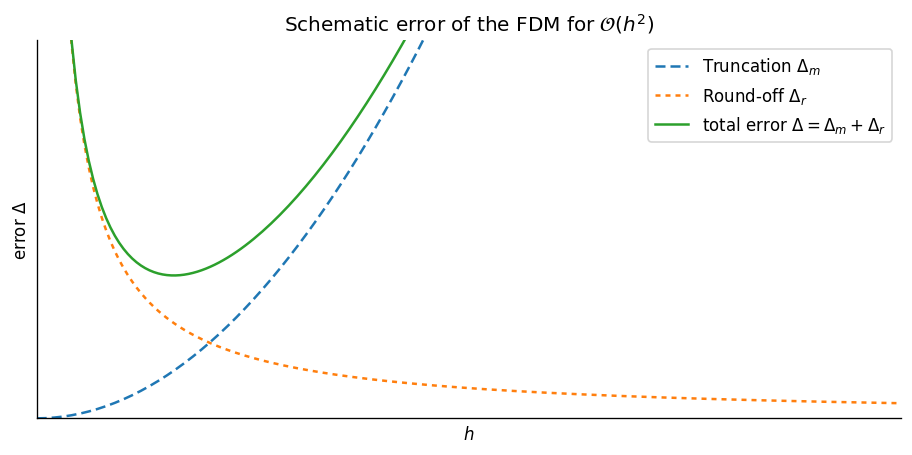

In [ ]:
showTheoreticalError(2)

$D_1(h)=\frac{f(x+h)-f(x)}{h}=\color{green}{f'(x)}+\color{red}{\frac{1}{2!}f''(x)h}+\frac{1}{3}f'''(x)h^2+\ldots$

$D_2(h)=\frac{f(x+h)-f(x-h)}{2h}=\color{green}{f'(x)}+\color{red}{\frac{1}{6}f'''(x)h^2}+O(h^4)$

In [ ]:
def D1(x, h, f):  # Forward
    return (f(x+h)-f(x))/h;

def D2(x, h, f): # Centered
    return (f(x+h)-f(x-h))/(2*h);

def f (x): # Example
    return np.sin(x);

h = np.logspace(-16, 0, num=500, endpoint=True)
x = 1.0;
D1f = D1(x, h, f);
D2f = D2(x, h, f);
df = np.cos(x);  # exact f'
Error1 = np.abs(D1f-df);
Error2 = np.abs(D2f-df);

In [ ]:
import matplotlib.style
import matplotlib as mpl
mpl.style.use('default')

def plot_FD_errors():
    plt.figure(figsize=(6,3.5), dpi=150)
    plt.title('Error of the finite difference methods for $f(x)=\sin(x)$')
    plt.xlabel('$h$')
    plt.ylabel("$|D_nf - f'|$")
    plt.text(1e-6, 1e-6, r'Truncation dominant')
    plt.text(1e-14, 1e-6, r'Round-off dominant')
    plt.grid(True)
    plt.loglog(h, Error1)#, basex=10)
    plt.loglog(h, Error2)#, basex=10)
    plt.legend('best')
    plt.legend(['$\mathcal{O}(h)$ - Forward diff.', '$\mathcal{O}(h^2)$ -  Centered diff.'])
    plt.show()

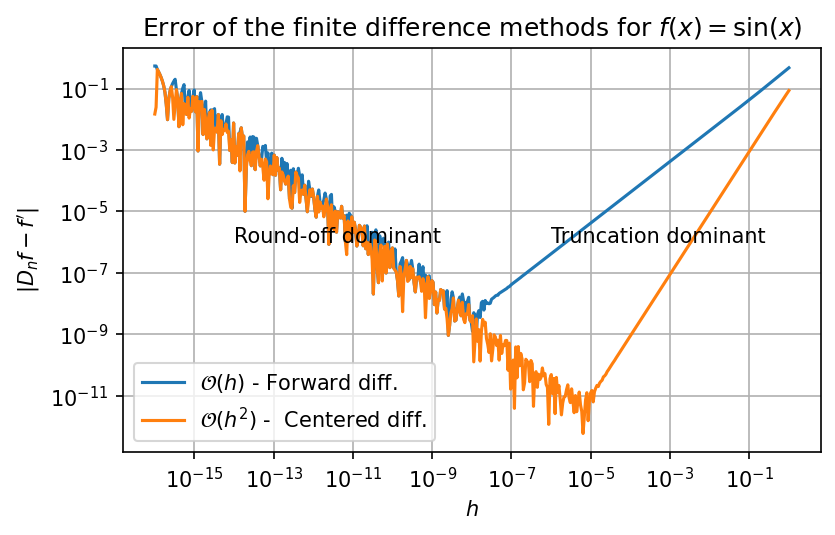

In [ ]:
plot_FD_errors()

In [ ]:
# SYMBOLIC COMPUTATION (CAS)
import sympy as sy
x = sy.symbols('x')
f = sy.exp(x)*sy.sin(x)*sy.cos(x)
df = sy.diff(f)
print(df)

-exp(x)*sin(x)**2 + exp(x)*sin(x)*cos(x) + exp(x)*cos(x)**2
